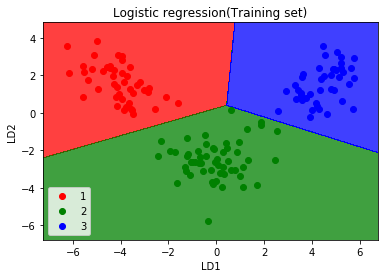

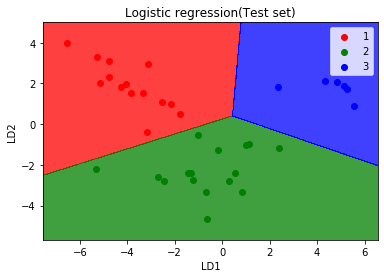

In [1]:
#LDA
#Logistic regression------
#Importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#Importing the datasets
dataset=pd.read_csv('E:\\machine leraning\\Machine Learning A-Z\\Part 9 - Dimensionality Reduction\\Section 44 - Linear Discriminant Analysis (LDA)\\Wine.csv')
x=dataset.iloc[:,0:13].values
y=dataset.iloc[:,13].values

#splitting the data set in training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
#Applyin the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

#importing warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#fitting Logistic Regression model in the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='lbfgs',random_state=0)
classifier.fit(x_train,y_train)

#predicting the results
y_pred=classifier.predict(x_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) 


#Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
    
                             
plt.title('Logistic regression(Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


#Visualizing the test set result
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
    
                             
plt.title('Logistic regression(Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()